In [ ]:
!pip install graycode

  Created wheel for graycode: filename=graycode-1.0.5-py3-none-any.whl size=3996 sha256=3b96004f941063ab5eabcd740c1e107a6f18a7dd6a139f50b6f1fe7b45221957
  Stored in directory: /root/.cache/pip/wheels/b1/2f/94/5c20957a48c9b907c05b4460622beb2f7bba72c88409091590
Successfully built graycode


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import graycode
from mpl_toolkits.mplot3d import Axes3D
import time

Evoluir uma população para reconhecer o número 0, representado pela bitstring "1 1 1 1 0 1 1 0 1 1 1 1":

- Utilizando uma população (inicializada aleatóriamente) de 8 indivíduos representados por um vetor de 12 bits;
- Distância de Hamming (que calcula quantos bits do indivíduo atual diferem do ideal) como parte da avaliação de aptidão e aptidão ideal de valor 12;
- Seleção pelo método da roleta simples (calculada proporcionalmente a partir das aptidões);
- Crossover de 1 ponto;
- Mutação em 1 gene.

Teste com diferentes taxas de crossover e mutação, assim como apenas crossover e apenas mutação para comparar os resultados.

In [ ]:
def gera_populacao(quantidade_individuos, tamanho_gene):
  populacao = []

  for i in range(quantidade_individuos):
    populacao.append([np.random.choice([0,1]) for j in range(tamanho_gene)])

  return populacao

In [ ]:
def calcula_distancia_hamming(individuo, target):
  diferente = 0

  for i in range(len(target)):
    if individuo[i] != target[i]:
      diferente += 1

  return diferente

In [ ]:
def calcula_distancias(populacao, target):
  distancias = []

  for individuo in populacao:
    distancias.append(calcula_distancia_hamming(individuo, target))

  return distancias

In [ ]:
def calcula_aptidao(populacao, target, aptidao_ideal, return_distancias=False):
  aptidoes = []
  distancias = calcula_distancias(populacao, target)

  for distancia in distancias:
    aptidoes.append(aptidao_ideal - distancia)

  if return_distancias:
    return aptidoes, distancias
  return aptidoes

In [ ]:
def gera_roleta(aptidoes):
  fT = sum(aptidoes)
  roleta = []
  acc = 0

  for aptidao in aptidoes:
    porcao = (aptidao*360)/fT
    acc += porcao
    roleta.append(acc)

  return roleta

In [ ]:
def selecao_roleta(aptidoes):
  roleta = gera_roleta(aptidoes)
  resultado = np.random.randint(0, 360)
  indice_selecionado = 0

  for porcao in roleta:
    if resultado < porcao:
      break
    indice_selecionado += 1

  return indice_selecionado

In [ ]:
def crossover(individuo_1, individuo_2, ponto):
  descendente_1 = individuo_1[:ponto] + individuo_2[ponto:]
  descendente_2 = individuo_2[:ponto] + individuo_1[ponto:]

  return (descendente_1, descendente_2)

In [ ]:
def mutacao(individuo, indice):
  individuo[indice] = 0 if individuo[indice] == 1 else 1
  return

In [ ]:
def calcula_media_lista(lista):
  return sum(lista)/len(lista)

In [ ]:
def reconhece_padrao(target, aptidao_ideal, taxa_crossover, taxa_mutacao, print_resultado=False, plot_resultado=True):
  #Inicializar P
  populacao = gera_populacao(8, 12)

  #f = avaliar(P)
  aptidoes, distancias = calcula_aptidao(populacao, target, aptidao_ideal, return_distancias=True)
  
  iteracao = 0

  result = {'it': [], 'apt': {'avg': [], 'best': []}, 'dist': {'avg': [], 'best': []}}

  while (aptidao_ideal not in aptidoes) and (iteracao < 100000):
    if print_resultado:
      print('Iteração', iteracao)
      print(' -> Aptidões:', aptidoes, '\ Aptidão média:', calcula_media_lista(aptidoes), '\ Melhor aptidão:', max(aptidoes))
      print(' -> Distâncias:', distancias, '\ Distância média:', calcula_media_lista(distancias), '\ Melhor distância:', min(distancias))
    result['it'].append(iteracao)
    result['apt']['avg'].append(calcula_media_lista(aptidoes))
    result['apt']['best'].append(max(aptidoes))
    result['dist']['avg'].append(calcula_media_lista(distancias))
    result['dist']['best'].append(min(distancias))
  
    #P = Selecionar(P, f)
    selecao = []
    for i in range(len(populacao)):
      selecao.append(selecao_roleta(aptidoes))

    #P = Reproduzir(P, f, pc)
    nova_populacao = []
    for i in range(0, len(selecao), 2):
      r = random.uniform(0, 1)
      if r <= taxa_crossover:
        ponto_crossover = np.random.randint(1, 12)
        descendentes = crossover(populacao[selecao[i]], populacao[selecao[i+1]], ponto_crossover)
        nova_populacao.append(descendentes[0])
        nova_populacao.append(descendentes[1])
      else:
        nova_populacao.append(populacao[selecao[i]])
        nova_populacao.append(populacao[selecao[i+1]])
    
    #P = Variar(P, pm)
    for individuo in nova_populacao:
      r = random.uniform(0, 1)
      if r <= taxa_mutacao:
        ponto_mutacao = np.random.randint(0, 12)
        mutacao(individuo, ponto_mutacao)
    
    #f = avaliar(P)
    aptidoes, distancias = calcula_aptidao(nova_populacao, target, aptidao_ideal, return_distancias=True)
    populacao = nova_populacao.copy()
    iteracao += 1

  if print_resultado:
    print('Iteração', iteracao)
    print(' -> Aptidões:', aptidoes, '\ Aptidão média:', calcula_media_lista(aptidoes), '\ Melhor aptidão:', max(aptidoes))
    print(' -> Distâncias:', distancias, '\ Distância média:', calcula_media_lista(distancias), '\ Melhor distância:', min(distancias))
  result['it'].append(iteracao)
  result['apt']['avg'].append(calcula_media_lista(aptidoes))
  result['apt']['best'].append(max(aptidoes))
  result['dist']['avg'].append(calcula_media_lista(distancias))
  result['dist']['best'].append(min(distancias))
  
  if plot_resultado:
    plot_result(result)

  return result

In [ ]:
def plot_result(result, plot_dist=True):
  if plot_dist:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
  else:
    fig, ax1 = plt.subplots(figsize=(15,5))

  ax1.plot(result['it'], result['apt']['avg'], label='Média')
  ax1.plot(result['it'], result['apt']['best'], '-', label='Melhor')
  ax1.set_title('Aptidão')
  ax1.legend()
  ax1.set_xlabel('Iteração')

  if plot_dist:
    ax2.plot(result['it'], result['dist']['avg'], label='Média')
    ax2.plot(result['it'], result['dist']['best'], '-', label='Melhor')
    ax2.set_title('Distância de Hamming')
    ax2.legend()
    ax2.set_xlabel('Iteração')

  plt.show()

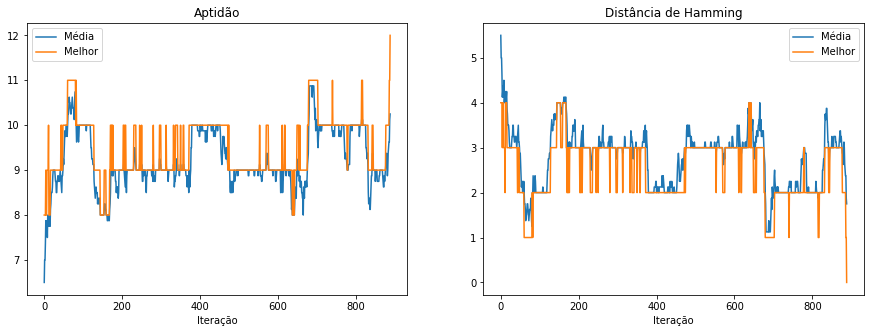

In [ ]:
result_1 = reconhece_padrao(target = [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], aptidao_ideal = 12, taxa_crossover = 0.6, taxa_mutacao = 0.02, print_resultado=False, plot_resultado=True)

Reference: 
- Aula: Computação Evolutiva (Parte 2). Professor [Fabricio Breve](https://www.fabriciobreve.com/class-materials/computacao-inspirada-pela-natureza/).